In [23]:
import numpy as np

In [24]:
from data_generator import DataGenerator

## Simulate a tree

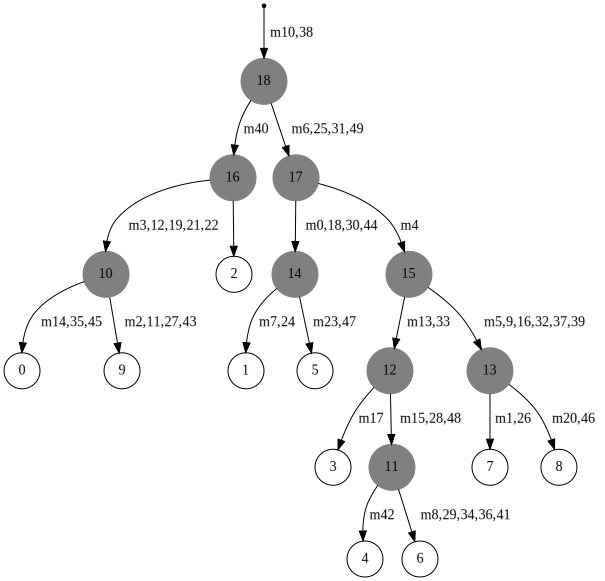

In [25]:
# Generate a random cell lineage tree with 10 samples and 50 mutations
generator = DataGenerator(10, 50)
generator.random_tree()

# Visualize the generated tree
# Cells are represented by white circles
# Ancestor cells are represented by grey circles
# Mutations are indicated on branches
generator.tree.to_graphviz()

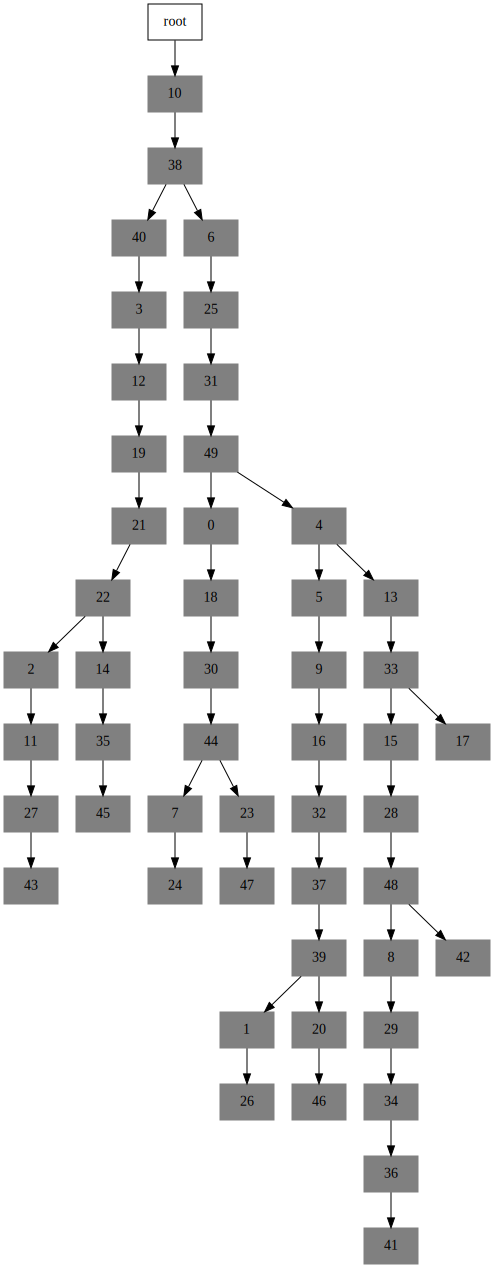

In [26]:
# Convert to mutation tree and visualize it
from tree import MutationTree
mut_tree = MutationTree(generator.tree.n_mut)
mut_tree.fit_structure(generator.tree)
mut_tree.to_graphviz()

In [27]:
# Alter the genotypes in a set of the mutation sites
# Here, 50% of the sites will be mutated
# The argument "genotype_freq" specifies the proportions of each genotype in wildtype cells (i.e. at the root)
# 1/3 of the mutated sites will be homozygous for the reference allele
# 1/3 of the mutated sites will be homozygous for the alternative allele
# 1/3 of the mutated sites will be heterozygous
generator.random_mutations(mut_prop = 0.5, genotype_freq = [1/3, 1/3, 1/3])

In [28]:
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

A->H
A->A
H->H
R->R
H->H
R->R
H->A
A->H
A->H
H->H
R->R
H->H
A->A
H->H
A->A
A->H
H->A
H->A
H->H
H->A
H->R
A->H
H->A
H->R
H->A
H->H
H->H
H->R
R->H
H->H
A->H
H->H
H->R
R->R
A->A
A->A
R->R
R->H
A->A
A->H
H->A
H->H
H->R
A->H
R->H
R->R
R->H
R->R
H->A
A->A


In [29]:
# Generate read counts matries for the tree data
ref, alt = generator.generate_reads()

In [30]:
i = 0 # cell index
j = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i, ref[i,j], alt[i,j], j))

Cell 0 has 0 reference reads and 7 alternative reads at locus 0


### Select mutations to be used for inference

In [31]:
from mutation_detection import filter_mutations, likelihood_matrices
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0.5)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [32]:
likelihoods1, likelihoods2 = likelihood_matrices(ref, alt, gt1, gt2)

In [33]:
print(gt1[0], gt2[0])

A H


In [34]:
i = 0
j = 0
print('Likelihood of cell %d being wildtype at locus %d is %f' % (i, j, np.exp(likelihoods1[i,j])))
print('Likelihood of cell %d being mutated at locus %d is %f' % (i, j, np.exp(likelihoods2[i,j])))

Likelihood of cell 0 being wildtype at locus 0 is 0.705768
Likelihood of cell 0 being mutated at locus 0 is 0.011338


## Tree inference

In [35]:
from tree_inference import TreeOptimizer
optimizer = TreeOptimizer()
optimizer.fit(likelihoods1, likelihoods2, reversible = True)

In [36]:
optimizer.optimize()

[Cell Tree Space] convergence after 165 steps and 11 move(s).
[Mutation Tree Space] convergence after 140 steps and 0 move(s).
[Cell Tree Space] convergence after 50 steps and 0 move(s).


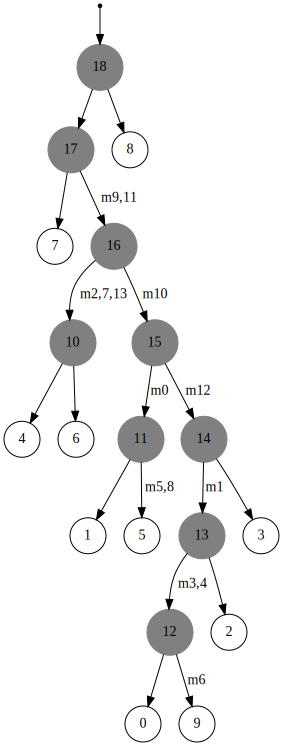

In [37]:
optimizer.ct.to_graphviz()